### Implementing Linear regression using Batch Gradient descent on 2x2 dataset

In [3]:
import numpy as np

In [5]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value


In [22]:
""" computing the cost
now to calculate cost, we need: 
1. m - the number of data points
2. y^ - predicted value (formula: w.xi + b)
3. y - target value
4. x - input value
4. w - weight
5. b - bias
"""
def compute_cost(w,b,y,x):
    
    # number of examples we will loop (since its summation)
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2*m) * cost

    return total_cost


Now we have the compute_cost function, which will help us compute the cost of any w or b.

Next, we need to calculate gradient, so that we can update w and b to minimize the error and get the best possible solution.

To calculate the gradient and update w and b, we need:
1. learning rate
2. w_old
3. pde of cost wrt w - which is the gradient

so first we will create a function: compute_gradient


*gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

$
\frac{\partial J}{\partial w}
= \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}_i - y_i ) x_i
$


Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [ ]:
"""
calculate the gradient
"""
def compute_gradient(w,b,x,y):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i] # partial derivate of J(cost function) w.r.t w 
        dj_db_i = (f_wb - y[i]) # partial derivate of J(cost function) w.r.t b
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

Now we have the function to calculate the gradient, and now we will move forward to calculate the descent and update w and b.

In [24]:
def gradient_descent(compute_cost, compute_gradient, w_in, b_in, x, y, alpha, num_iters):
    """
        w_in = initial weight 
        b_in = initial bias
        alpha = learning rate (hyperparam)
        compute_cost = function to compute cost using MSE
        compute_gradient = function to compute gradient and give the value of dj_dw and dj_db
        x = training input values
        y = training target values
        num_iters = number of iterations the gradient descent will run, since this is batch gd, we can also call it epochs (as it sees the entire data n number of times)

    Returns:
        w_new = updated w
        b_new = updated b
        J_history = history of costs
        p_history = history of params (w and b)
    """
    J_history = []
    p_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):
        # w_new = w_old - alpha * gradient
        dj_dw, dj_db = compute_gradient(w,b,x,y)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J_history.append(compute_cost(w,b,x,y))
        p_history.append([w,b])

    return w, b, J_history, p_history
        


In [ ]:
iterations = 1000
w_final,b_final,J_his, p_his = gradient_descent(compute_cost, compute_gradient, 0, 0, x_train, y_train, 0.1, iterations)
print("Final weight:", w_final)
print("Final bias:", b_final)

for i in range(iterations):
    print(J_his[i], p_his[i])

In [33]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


#### Using vectorization, in single variate linear regression

so 1 feature, multiple data points

In [16]:
# x = [x₁, x₂, ..., xₘ]
# y = [y₁, y₂, ..., yₘ]
import random
import numpy as np
x = np.arange(1,30,2)
y = np.arange(1, 60,4 )
print(y.size)
print(x.size)

15
15


In [17]:
print(x)
print(y)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]
[ 1  5  9 13 17 21 25 29 33 37 41 45 49 53 57]


In [ ]:
# model = y^ = w * x + b
# here x = 1 ( one feature, with multiple data points)

# first we need to get the value for w and b.

# for that, we need a gradient function, and since we are using vectorization, we will not use loops.

def compute_gradient_using_vectorization(w,b,x,y):
    f_wb = w * x + b
    # w = 1, b = 0 (example initial w & b)
    # x = [1,3,5,7,9,11,...]
    # y = [100, 120, 140, 160, 180, ...] 
    dj_dw = np.sum((f_wb - y) * x)
    dj_db = np.sum((f_wb - y))
    dj_dw = dj_dw/x.size
    dj_db = dj_db/x.size

    return dj_dw, dj_db


[0.043466444255648225, 0.043444840424710106, 0.04342324733137705, 0.04340166497031239, 0.043380093336181806]
[1.970408933722177, 1.9704162883592786, 1.9704236411684404, 1.9704309921501166, 1.9704383413047617]
Predicted value of Y for input 50 is 98.1120


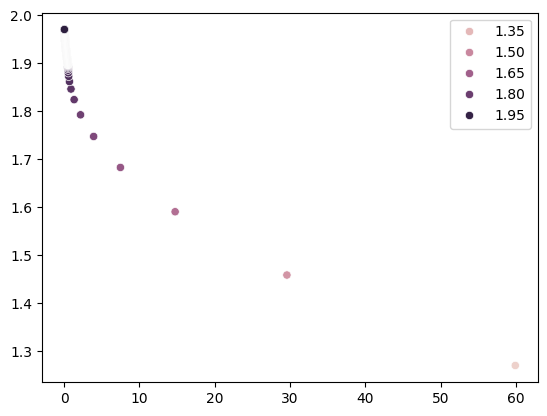

In [ ]:
def gradient_descent_using_vectorization(compute_gradient_using_vectorization, w, b, x, y, alpha, num_iters):
    J_history = []
    w_history = []
    b_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_using_vectorization(w,b,x,y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        w_history.append(w)
        b_history.append(b)
        J_history.append(np.mean((w * x + b - y) ** 2) / 2) # basically this is cost formula: 1/2m (f_wb - y)^2 and since we are doing 1/m, we have taken np.mean here.

    return w,b, J_history, w_history, b_history

weight, bias, cost_history, weight_history, bias_history = gradient_descent_using_vectorization(compute_gradient_using_vectorization, 1,1,x,y,0.001, 5000)

# final equation:
input = 50
y_pred = weight * input + bias
import seaborn as sns
sns.scatterplot(x = cost_history,y = weight_history, hue=weight_history)
print(cost_history[-5:])
print(weight_history[-5:])
print(f"Predicted value of Y for input {input} is {y_pred:.4f}")

[114028.61037037038, 96174684.26282144, 81116312676.56268, 68415677588271.7, 5.77036207073738e+16, 4.8668784116687086e+19, 4.104856018322623e+22, 3.4621458573447593e+25, 2.920066838891838e+28, 2.4628628298564133e+31, 2.0772446842313594e+34, 1.7520039792143053e+37, 1.4776872298597655e+40, 1.2463211129633702e+43, 1.0511807135029955e+46, 8.865940574603286e+48, 7.477772495506587e+51, 6.30695423954574e+54, 5.319454664290266e+57, 4.486570989847161e+60, 3.784094520452846e+63, 3.1916069916479924e+66, 2.6918870905786314e+69, 2.270409899272173e+72, 1.914924711647191e+75, 1.6150989530360091e+78, 1.362217852342707e+81, 1.1489311374718003e+84, 9.690393914468741e+86, 8.173138594207321e+89, 6.893444690662346e+92, 5.814116468904634e+95, 4.903782046699805e+98, 4.135981535654676e+101, 3.488397954959845e+104, 2.9422085633759565e+107, 2.4815377552021473e+110, 2....................., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
nan
C:\Users\sangh\AppData\Local\Temp\ipykernel_16860\1331383931.py:7: RuntimeWarning: overflow encountered in square
  J_history.append(np.mean((w * x + b - y) ** 2) / 2)
C:\Users\sangh\AppData\Local\Temp\ipykernel_16860\3892922468.py:13: RuntimeWarning: overflow encountered in multiply
  dj_dw = np.sum((f_wb - y) * x)
c:\Users\sangh\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\sangh\AppData\Local\Temp\ipykernel_16860\1331383931.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  w = w - alpha * dj_dw

---

This is what happens when the learning rate is very high hence its overshooting the minimum, again and again, and this is no more a gradient descent, its become gradient ascent, and hence it leads to first error:  OVERFLOW

